# ASR Assignment 2019-20

This notebook has been provided as a template to get you started on the assignment.  Feel free to use it for your development, or do your development directly in Python.

You can find a full description of the assignment [here](http://www.inf.ed.ac.uk/teaching/courses/asr/2019-20/coursework.pdf).

You are provided with two Python modules `observation_model.py` and `wer.py`.  The first was described in [Lab 3](https://github.com/Ore-an/asr_lab3/blob/master/asr_lab3.ipynb).  The second can be used to compute the number of substitution, deletion and insertion errors between ASR output and a reference text.

It can be used as follows:

```python
import wer

my_refence = 'A B C'
my_output = 'A C C D'

wer.compute_alignment_errors(my_reference, my_output)
```

This produces a tuple $(s,d,i)$ giving counts of substitution,
deletion and insertion errors respectively - in this example (1, 0, 1).  The function accepts either two strings, as in the example above, or two lists.  Matching is case sensitive.

## Template code

Assuming that you have already made a function to generate an WFST, `create_wfst()` and a decoder class, `MyViterbiDecoder`, you can perform recognition on all the audio files as follows:


In [1]:
np.array([1,1,1])+[1,1,1]

NameError: name 'np' is not defined

# Q:Why is determinize() change the WER??

In [2]:
rerun the self-loop and tree structured.

No lines in history match specification


In [1]:
import glob
import os
import wer
import observation_model
import openfst_python as fst
import time
from experiment import *
from tqdm import tqdm_notebook as tqdm
import pdb
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import pickle
import cProfile

%reload_ext autoreload
%autoreload 2

def save_obj(obj, name ):
    with open('obj/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open('obj/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [6]:
def parse_lexicon(lex_file):
    """
    Parse the lexicon file and return it in dictionary form.

    Args:
        lex_file (str): filename of lexicon file with structure '<word> <phone1> <phone2>...'
                        eg. peppers p eh p er z

    Returns:
        lex (dict): dictionary mapping words to list of phones
    """

    lex = {}  # create a dictionary for the lexicon entries (this could be a problem with larger lexica)
    with open(lex_file, 'r') as f:
        for line in f:
            line = line.split()  # split at each space
            lex[line[0]] = line[1:]  # first field the word, the rest is the phones
    return lex
lex = parse_lexicon('lexicon.txt')

In [7]:
lex

{'a': ['ey'],
 'of': ['ah', 'v'],
 'peck': ['p', 'eh', 'k'],
 'peppers': ['p', 'eh', 'p', 'er', 'z'],
 'peter': ['p', 'iy', 't', 'er'],
 'picked': ['p', 'ih', 'k', 't'],
 'pickled': ['p', 'ih', 'k', 'ah', 'l', 'd'],
 'piper': ['p', 'ay', 'p', 'er'],
 'the': ['dh', 'iy'],
 "where's": ['w', 'eh', 'r', 'z']}

In [15]:
len(lex['piper'])

4

In [18]:
sum([1,2])

3

In [24]:
def ave_length():
    cum_phones=0
    cum_aud_frms=0
    om = observation_model.ObservationModel()

    for wav_file in glob.glob('/group/teaching/asr/labs/recordings/*.wav'):
        trans = read_transcription(wav_file).split()
        cum_phones += 3*sum([len(lex[w]) for w in trans])
#         print(wav_file)
        om.load_audio(wav_file)
        cum_aud_frms += om.observation_length()
#         print(om.observation_length())
    print(cum_phones)
    print(cum_aud_frms)
    print(cum_words/cum_aud_frms)
    
ave_length()

Exception: 

In [22]:
23727/94803

0.25027688997183634

In [ ]:
94803

## Task 1 - Initial systems

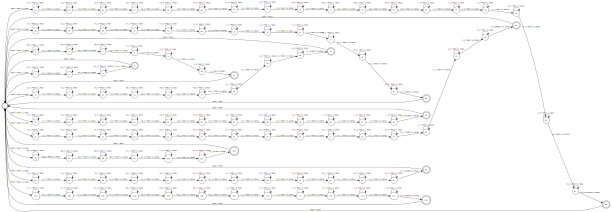

In [10]:
f = MyWFST(lexicon='lexicon.txt').create_wfst_word_output()
f

In [5]:
time_cost,computation_counter,num_states,num_arcs,tot_errors,tot_words = run_exp(f,num_test = 180)



    Run time: 2024.0772461891174, 
    Number of forward computations: 20743930,
    Number of states and arcs: 116 230,
    Number of errors 2213 ([ 800  172 1241]) in 2177 words 1.0165365181442352.
    


In [4]:
print(time_cost,computation_counter,num_states,num_arcs,tot_errors,tot_words)

863.7485847473145 20743930 116 230 2213 2177


## Task2 - System tuning

#### varying the self-loop probabilities

In [6]:
# array of different self loop probabilities
self_prob = [0.99]
results_sp = defaultdict(list)
for sp in self_prob:
    weight_dict = {'self-loop': sp,'next': 1-sp}
    f = MyWFST(lexicon='lexicon.txt').create_wfst_word_output(weight_dictionary = weight_dict)
    time_cost,computation_counter,num_state,num_arc,tot_error,tot_word = run_exp(f,num_test = 180)
    results_sp[sp] = [time_cost,computation_counter,num_state,num_arc,tot_error]



    Run time: 2031.8309967517853, 
    Number of forward computations: 20532475,
    Number of states and arcs: 116 230,
    Number of errors 1408 ([584 519 305]) in 2177 words 0.6467615985300873.
    


In [6]:
# array of different self loop probabilities
self_prob = [0.8]
results_sp = defaultdict(list)
for sp in self_prob:
    weight_dict = {'self-loop': sp,'next': 1-sp}
    f = MyWFST(lexicon='lexicon.txt').create_wfst_word_output(weight_dictionary = weight_dict)
    time_cost,computation_counter,num_state,num_arc,tot_error,tot_word = run_exp(f,num_test = 180)
    results_sp[sp] = [time_cost,computation_counter,num_state,num_arc,tot_error]



    Run time: 847.5769746303558, 
    Number of forward computations: 20602179,
    Number of states and arcs: 116 230,
    Number of errors 1465 ([642 390 433]) in 2177 words 0.6729444189251264.
    


In [2]:
# array of different self loop probabilities
self_prob = [0.99]
results_sp = defaultdict(list)
for sp in self_prob:
    weight_dict = {'self-loop': sp,'next': 1-sp}
    f = MyWFST(lexicon='lexicon.txt').create_wfst_word_output(weight_dictionary = weight_dict)
    time_cost,computation_counter,num_state,num_arc,tot_error,tot_word = run_exp(f,num_test = 180)
    results_sp[sp] = [time_cost,computation_counter,num_state,num_arc,tot_error]



    Run time: 881.1216428279877, 
    Number of forward computations: 20532476,
    Number of states and arcs: 116 230,
    Number of errors 1408 ((1, 1, 0)) in 2177 words 0.6467615985300873.
    


In [3]:
# array of different self loop probabilities
self_prob = [0.9]
results_sp = defaultdict(list)
for sp in self_prob:
    weight_dict = {'self-loop': sp,'next': 1-sp}
    f = MyWFST(lexicon='lexicon.txt').create_wfst_word_output(weight_dictionary = weight_dict)
    time_cost,computation_counter,num_state,num_arc,tot_error,tot_word = run_exp(f,num_test = 180)
    results_sp[sp] = [time_cost,computation_counter,num_state,num_arc,tot_error]



    Run time: 2204.1020901203156, 
    Number of forward computations: 20581575,
    Number of states and arcs: 116 230,
    Number of errors 1426 ((1, 1, 0)) in 2177 words 0.6550298576022049.
    


In [6]:
# array of different self loop probabilities
self_prob = np.linspace(0.2,0.8,num=3)
results_sp = defaultdict(list)
for sp in self_prob:
    weight_dict = {'self-loop': sp,'next': 1-sp}
    f = MyWFST(lexicon='lexicon.txt').create_wfst_word_output(weight_dictionary = weight_dict)
    time_cost,computation_counter,num_state,num_arc,tot_error,tot_word = run_exp(f,num_test = 180)
    results_sp[sp] = [time_cost,computation_counter,num_state,num_arc,tot_error]



    Run time: 857.3872385025024, 
    Number of forward computations: 20703226,
    Number of states and arcs: 116 230,
    Number of errors 1856 ((2, 0, 2)) in 2177 words 0.8525493798805696.
    




    Run time: 855.3699233531952, 
    Number of forward computations: 20645023,
    Number of states and arcs: 116 230,
    Number of errors 1572 ((1, 0, 1)) in 2177 words 0.7220946256316031.
    




    Run time: 852.8390629291534, 
    Number of forward computations: 20601861,
    Number of states and arcs: 116 230,
    Number of errors 1465 ((1, 1, 1)) in 2177 words 0.6729444189251264.
    


In [8]:
save_obj(results_sp,"task2_tranp_result")

In [3]:
load_obj('task2_tranp_result')

defaultdict(list,
            {0.2: [857.3872385025024, 20703226, 116, 230, 1856],
             0.5: [855.3699233531952, 20645023, 116, 230, 1572],
             0.8: [852.8390629291534, 20601861, 116, 230, 1465]})

####  final probabilities

In [5]:
# array of different final probabilities
final_prob = [0.01]
results_fp = defaultdict(list)
for fp in final_prob:
    f = MyWFST(lexicon='lexicon.txt').create_wfst_word_output(fin_probability = fp)
    time_cost,computation_counter,num_state,num_arc,tot_error,tot_word = run_exp(f,num_test = 180)
    results_fp[fp] = [time_cost,computation_counter,num_state,num_arc,tot_error]



    Run time: 896.4315874576569, 
    Number of forward computations: 20781444,
    Number of states and arcs: 116 230,
    Number of errors 1769 ((2, 0, 2)) in 2177 words 0.8125861276986679.
    


In [6]:
# array of different final probabilities
final_prob = [0.2]
results_fp = defaultdict(list)
for fp in final_prob:
    f = MyWFST(lexicon='lexicon.txt').create_wfst_word_output(fin_probability = fp)
    time_cost,computation_counter,num_state,num_arc,tot_error,tot_word = run_exp(f,num_test = 180)
    results_fp[fp] = [time_cost,computation_counter,num_state,num_arc,tot_error]



    Run time: 892.8247375488281, 
    Number of forward computations: 20777300,
    Number of states and arcs: 116 230,
    Number of errors 1898 ((2, 0, 2)) in 2177 words 0.8718419843821773.
    


In [10]:
# array of different final probabilities
final_prob = np.linspace(0.1,0.8,num=3)
results_fp = defaultdict(list)
for fp in final_prob:
    f = MyWFST(lexicon='lexicon.txt').create_wfst_word_output(fin_probability = fp)
    time_cost,computation_counter,num_state,num_arc,tot_error,tot_word = run_exp(f,num_test = 180)
    results_fp[fp] = [time_cost,computation_counter,num_state,num_arc,tot_error]



    Run time: 858.2627913951874, 
    Number of forward computations: 20779961,
    Number of states and arcs: 116 230,
    Number of errors 1863 ((2, 0, 2)) in 2177 words 0.8557648139641709.
    




    Run time: 860.3431875705719, 
    Number of forward computations: 20768891,
    Number of states and arcs: 116 230,
    Number of errors 1965 ((2, 0, 2)) in 2177 words 0.9026182820395039.
    




    Run time: 865.4950683116913, 
    Number of forward computations: 20751795,
    Number of states and arcs: 116 230,
    Number of errors 2144 ((2, 0, 2)) in 2177 words 0.9848415250344511.
    


In [12]:
save_obj(results_fp,"task2_finalp_result")

#### use baum-welch to update weights

In [10]:
f = MyWFST(lexicon='lexicon.txt').create_wfst_word_output()
train_Baum_Welch(f=f,n=5,save=True)

Round 1 of Baum-Welch...


ValueError: math domain error

In [16]:
# load weight_dictionary
results_bw = defaultdict(list)
w_d = load_weight_dictionary(filename = 'weight_dictionary_final.txt')
f = MyWFST(lexicon='lexicon.txt').create_wfst_word_output(weight_dictionary=w_d)
time_cost,computation_counter,num_state,num_arc,tot_error,tot_word = run_exp(f,num_test = 180)
results_bw['bw'] = [time_cost,computation_counter,num_state,num_arc,tot_error]



    Run time: 844.0008387565613, 
    Number of forward computations: 20645591,
    Number of states and arcs: 116 230,
    Number of errors 1585 ([697 324 564]) in 2177 words 0.7280661460725769.
    


In [ ]:
save_obj(results_bw,"task2_baumwelch_result")

#### using transitions to each word based on unigram word probabilities (see advanced task)

#### add sil to lexicon

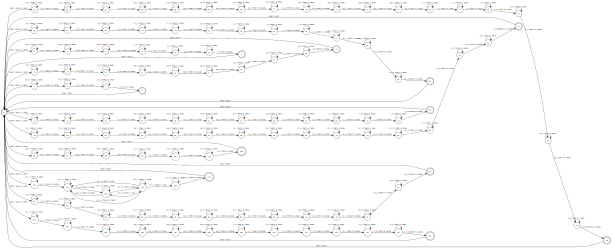

In [2]:
f = MyWFST(lexicon='lexicon_sil.txt').create_wfst_word_output()
f

In [13]:
# compare lexicon with silence and without
f = MyWFST(lexicon='lexicon_sil.txt').create_wfst_word_output()
results_lex_sil = defaultdict(list)

time_cost,computation_counter,num_state,num_arc,tot_error,tot_word = run_exp(f,num_test = 180)
results_lex_sil['lexicon_sil'] = [time_cost,computation_counter,num_state,num_arc,tot_error]



    Run time: 901.2565467357635, 
    Number of forward computations: 22219854,
    Number of states and arcs: 122 246,
    Number of errors 1431 ((2, 0, 1)) in 2177 words 0.6573265962333487.
    


In [14]:
save_obj(results_lex_sil,"task2_sil_result")

## Task3 - Pruning

In [15]:
# compare a range fo different pruning thresholds
thresholds = np.linspace(0.1,0.99,num=5,endpoint=False)
results_prun = defaultdict(list)

for thresh in thresholds:
    f = MyWFST(lexicon='lexicon.txt').create_wfst_word_output()
    time_cost,computation_counter,num_state,num_arc,tot_error,tot_word = run_exp(f,num_test = 180,
                                                                                 beam_width=-math.log(thresh))
    results_prun[thresh] = [time_cost,computation_counter,num_state,num_arc,tot_error]

No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.


    Run time: 383.9350497722626, 
    Number of forward computations: 6066554,
    Number of states and arcs: 116 230,
    Number of errors 3092 ((2, 0, 3)) in 2177 words 1.420303169499311.
    


No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the ob

No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the ob

No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the ob

No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the ob

In [16]:
save_obj(results_prun,"task3_pruning_result")

In [ ]:
results_prun = load_obj("task3_pruning_result")
results_prun

## Task4 - Advanced topics

#### tree structure

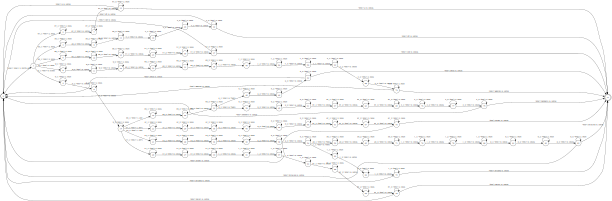

In [9]:
MyWFST().create_wfst_word_output(tree_struc= True)

In [10]:
results_strc = defaultdict(list)

f = MyWFST().create_wfst_word_output(tree_struc= True)
time_cost,computation_counter,num_state,num_arc,tot_error,tot_word = run_exp(f,num_test = 180)
results_strc['tree'] = [time_cost,computation_counter,num_state,num_arc,tot_error]



    Run time: 678.0767052173615, 
    Number of forward computations: 15681773,
    Number of states and arcs: 84 183,
    Number of errors 2214 ([ 790  174 1250]) in 2177 words 1.0169958658704639.
    


In [11]:
save_obj(results_strc,"task4_tree_result")

#### weight look ahead

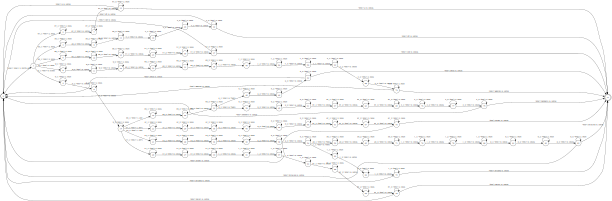

In [8]:
MyWFST(lexicon='lexicon.txt').create_wfst_word_output(tree_struc= True)

In [13]:
thresholds = np.linspace(0.1,0.99,num=3,endpoint=True)
results_push = defaultdict(list)

for thresh in thresholds:
    f = MyWFST(lexicon='lexicon.txt').create_wfst_word_output(weight_push = True,tree_struc= True)
    time_cost,computation_counter,num_state,num_arc,tot_error,tot_word = run_exp(f,num_test = 180,
                                                                                 beam_width=-math.log(thresh))
    results_push[thresh] = [time_cost,computation_counter,num_state,num_arc,tot_error]

No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the ob

No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the ob

No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the observations.
No path got to the end of the ob

In [14]:
save_obj(results_push,"task4_look_ahead")

#### different language models

In [3]:
results_lm = load_obj('task4_lm_result')

In [4]:
results_lm

defaultdict(list,
            {'bigram': [7820.8914885520935, 223591013, 1266, 2520, 2145]})

In [7]:
# different N gram language models
# ngrams = ['unigram','bigram']
# results_lm = defaultdict(list)
ngrams = ['unigram']
for lm in ngrams:
    f = MyWFST(lexicon='lexicon.txt').create_wfst_word_output(lm = lm)
    time_cost,computation_counter,num_state,num_arc,tot_error,tot_word = run_exp(f,num_test = 180)
    results_lm[lm] = [time_cost,computation_counter,num_state,num_arc,tot_error]



    Run time: 869.4267425537109, 
    Number of forward computations: 20745076,
    Number of states and arcs: 116 230,
    Number of errors 2188 ((0, 0, 3)) in 2177 words 1.0050528249885162.
    


NameError: name 'results_lm' is not defined

In [6]:
# different N gram language models
# ngrams = ['unigram','bigram']
# results_lm = defaultdict(list)
ngrams = ['bigram']
for lm in ngrams:
    f = MyWFST(lexicon='lexicon.txt').create_wfst_word_output(lm = lm)
    time_cost,computation_counter,num_state,num_arc,tot_error,tot_word = run_exp(f,num_test = 180)
    results_lm[lm] = [time_cost,computation_counter,num_state,num_arc,tot_error]



    Run time: 7820.8914885520935, 
    Number of forward computations: 223591013,
    Number of states and arcs: 1266 2520,
    Number of errors 2145 ((0, 0, 3)) in 2177 words 0.9853008727606798.
    


In [7]:
save_obj(results_lm,"task4_lm_result")